<a href="https://colab.research.google.com/github/madhukarbura/MYPROJECTS/blob/main/Chance_Of_Admission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CHANCE OF ADMISSION PREDICTION USING REGRESSION ANALYSIS**

**Import Library**

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**import Data**

In [32]:
df=pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/Admission%20Chance.csv')

In [33]:
df.head()

,Serial No,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [34]:
df.nunique()

Serial No            400
GRE Score             49
TOEFL Score           29
University Rating      5
 SOP                   9
LOR                    9
CGPA                 168
Research               2
Chance of Admit       60
dtype: int64

**Data preprocessing**

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No          400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4    SOP               400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [36]:
df.corr()

,Serial No,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No,1.000000,-0.097526,-0.147932,-0.169948,-0.166932,-0.088221,-0.045608,-0.063138,0.042336
GRE Score,-0.097526,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
TOEFL Score,-0.147932,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
University Rating,-0.169948,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
SOP,-0.166932,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
LOR,-0.088221,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
CGPA,-0.045608,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
Research,-0.063138,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
Chance of Admit,0.042336,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


**Remove Missing values**

In [37]:
df=df.dropna()

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No          400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4    SOP               400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


**Data Visualization**

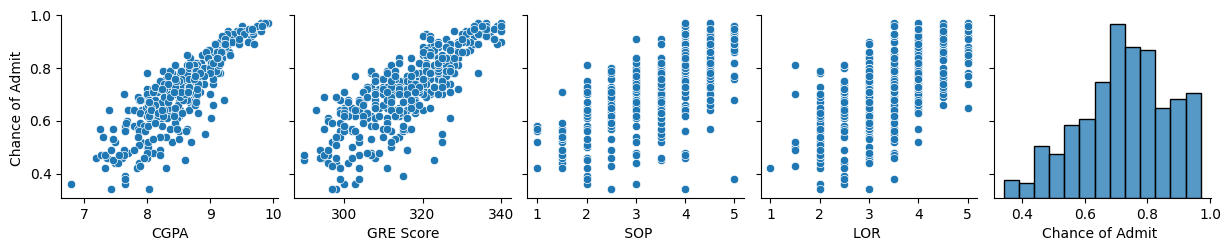

In [49]:
sns.pairplot(df,x_vars=['CGPA','GRE Score',' SOP','LOR ','Chance of Admit '],y_vars=['Chance of Admit ']);

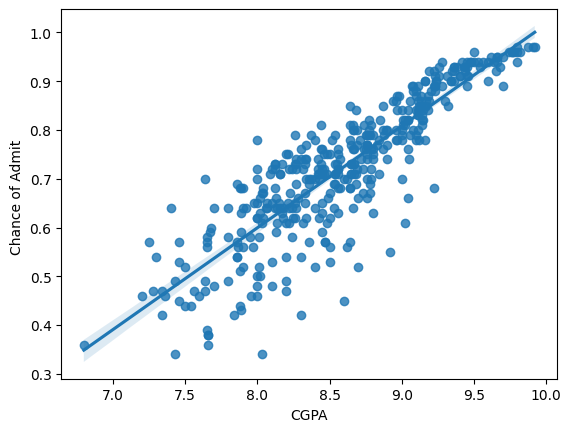

In [48]:
sns.regplot(x= 'CGPA',y= 'Chance of Admit ',data=df);

**Define Target Variable y and feature x**

In [46]:
df.columns

Index(['Serial No', 'GRE Score', 'TOEFL Score', 'University Rating', ' SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [47]:
y=df['Chance of Admit ']

In [29]:
y.shape

(626,)

In [53]:
x=df[['CGPA',' SOP','LOR ','GRE Score','TOEFL Score', 'University Rating','Research']]

In [54]:
x.shape

(400, 7)

**Scaling Data**

In [55]:
from sklearn.preprocessing import StandardScaler

In [56]:
ss=StandardScaler()

In [57]:
x=ss.fit_transform(x)

In [58]:
x

array([[ 1.76481828,  1.09386422,  1.16732114, ...,  1.74697064,
         0.79882862,  0.90911166],
       [ 0.45515126,  0.59665321,  1.16732114, ..., -0.06763531,
         0.79882862,  0.90911166],
       [-1.00563118, -0.39776881,  0.05293342, ..., -0.56252785,
        -0.07660001,  0.90911166],
       ...,
       [ 1.42900622,  1.59107523,  1.16732114, ...,  1.41704229,
         0.79882862,  0.90911166],
       [ 0.30403584,  0.0994422 ,  0.61012728, ..., -0.72749202,
        -0.07660001, -1.09997489],
       [ 1.78160888,  1.59107523,  0.61012728, ...,  1.58200646,
         0.79882862,  0.90911166]])

In [59]:
pd.DataFrame(x).describe()

,0,1,2,3,4,5,6
count,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02
mean,7.771561e-16,7.993606e-17,-1.332268e-16,-4.174439e-16,5.595524e-16,7.105427e-17,-3.996803e-17
std,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00
min,-3.020504e+00,-2.386613e+00,-2.733036e+00,-2.339367e+00,-2.542098e+00,-1.827457e+00,-1.099975e+00
25%,-7.201909e-01,-8.949798e-01,-5.042604e-01,-7.685900e-01,-7.274920e-01,-9.520286e-01,-1.099975e+00
50%,1.859559e-02,9.944220e-02,5.293342e-02,1.679859e-02,-6.763531e-02,-7.660001e-02,9.091117e-01
75%,7.783704e-01,5.966532e-01,6.101273e-01,7.149218e-01,7.571856e-01,7.988286e-01,9.091117e-01
max,2.218165e+00,1.591075e+00,1.724515e+00,2.023903e+00,2.076899e+00,1.674257e+00,9.091117e-01


**Train Test Split Data**

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=2529)

In [62]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((280, 7), (120, 7), (280,), (120,))

**Linear Regression Model**

In [63]:
from sklearn.linear_model import LinearRegression

In [64]:
lr=LinearRegression()

In [65]:
lr.fit(x_train,y_train)

LinearRegression()

In [66]:
lr.intercept_

0.7287978554892981

In [67]:
lr.coef_

array([ 0.0673856 , -0.00382693,  0.01770636,  0.02338345,  0.01741428,
        0.00647553,  0.01026114])

**Predict Test Data**

In [68]:
y_pred=lr.predict(x_test)

In [69]:
y_pred

array([0.71426327, 0.72534136, 0.69677103, 0.66566584, 0.57483872,
       0.93087527, 0.93701113, 0.72361387, 0.81130158, 0.62223963,
       0.59629648, 0.80084072, 0.52537944, 0.79174558, 0.84064992,
       0.66429594, 0.65136589, 0.66990687, 0.75794085, 0.86072023,
       0.66088101, 0.85570763, 0.84777425, 0.95033179, 0.68750762,
       0.65907671, 0.65279623, 0.5709259 , 0.55895645, 0.57990205,
       0.54497918, 0.7570717 , 0.69682571, 0.77286067, 0.64320811,
       0.5183554 , 0.43816818, 0.84654064, 0.90398354, 0.80517781,
       0.72218971, 0.72882587, 0.68145136, 0.88592237, 0.77208852,
       0.78778085, 0.95526121, 0.88586486, 0.59980416, 0.50690214,
       0.59947098, 0.63380406, 0.82841217, 0.44911724, 0.71068577,
       0.77335748, 0.68851557, 0.64486026, 0.85537724, 0.65517768,
       0.65046031, 0.90818978, 0.63422429, 0.68658606, 0.72150268,
       0.69030545, 0.59381287, 0.93813035, 0.58997351, 0.91542587,
       0.59283415, 0.93351713, 0.59478751, 0.71380389, 0.54346

**model Accuracy**

In [70]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,r2_score

In [71]:
mean_absolute_error(y_test,y_pred)

0.04400128934232653

In [72]:
mean_absolute_percentage_error(y_test,y_pred)

0.07575278864605443

In [73]:
r2_score(y_test,y_pred)

0.8066078856630297

**Polynomial Regression**

In [74]:
from sklearn.preprocessing import PolynomialFeatures

In [75]:
poly=PolynomialFeatures(degree=2,interaction_only=True,include_bias=False)

In [76]:
x_train2=poly.fit_transform(x_train)

In [77]:
x_test2=poly.fit_transform(x_test)

In [78]:
lr.fit(x_train2,y_train)

LinearRegression()

In [79]:
lr.intercept_

0.7255884841261832

In [80]:
lr.coef_

array([ 6.48377666e-02, -1.90088806e-03,  1.83301748e-02,  1.82608599e-02,
        2.02279218e-02,  4.96788996e-03,  1.28501026e-02, -3.86532395e-03,
        3.69968746e-03, -8.08207460e-03, -3.19485515e-03, -9.18620767e-03,
        1.97334000e-02, -1.05691927e-02, -2.05584129e-04,  1.50723457e-02,
        1.28764980e-02,  2.73971156e-03, -4.21248674e-03, -9.07999764e-03,
        1.16669217e-02, -7.32382611e-03, -3.13293373e-03,  1.41506287e-02,
        7.96667362e-05, -8.14362277e-03, -1.64363294e-03,  1.14481117e-03])

In [81]:
y_pred_poly=lr.predict(x_test2)

**Model Accuracy**

In [82]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,r2_score

In [83]:
mean_absolute_error(y_test,y_pred_poly)

0.04544737506303534

In [84]:
mean_absolute_percentage_error(y_test,y_pred_poly)

0.07872655431226615

In [85]:
r2_score(y_test,y_pred_poly)

0.7883759005723732